In [1]:
import scipp as sc
import plopp as pp
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
from scipp.serialization import serialize, deserialize
from beamlime.resources.images.loaders import load_icon_img
from beamlime.resources.images.generators import detector_image_generator
%matplotlib widget

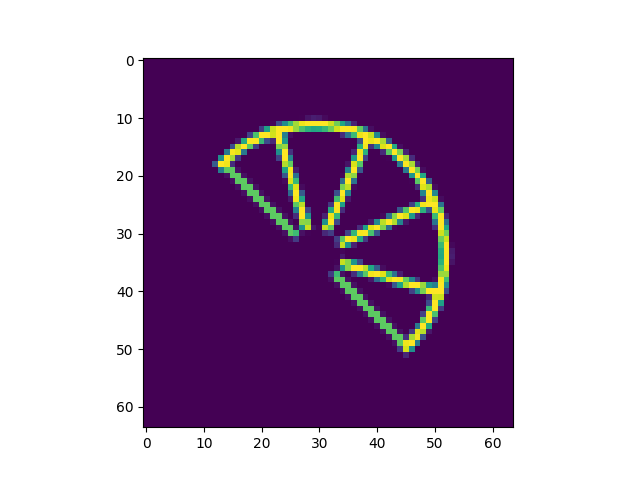

In [2]:
raw_img = load_icon_img()
single_channel_img = sum(raw_img.T)
smaller_y = sum(single_channel_img.reshape(256, 64, -1).T)
smaller = sum(smaller_y.reshape(64, 64, -1).T).T.reshape(64, 64, 1)
smaller /= 16
plt.imshow(smaller)
# plt.imshow(sum(folded)/folded.shape[0])

In [19]:
def process_img(img, offset=0.2, threshold=0.8):
    smaller_y = sum(img.reshape(256, 64, -1).T)
    smaller = sum(smaller_y.reshape(64, 64, -1).T)
    smaller /= 16
    resampled = sc.array(dims=['x', 'y'], values=smaller)
    da = sc.DataArray(data=resampled, coords={'x': sc.linspace('x', 0, 65, 65, unit='m'),
                                         'y': sc.linspace('y', 0, 65, 65, unit='m')})
    da.values += offset
    threshold_mask = (da.values > threshold)*np.ones(da.shape)
    da.values *= threshold_mask
    return da

In [20]:
base = sc.DataArray(data=sc.zeros(sizes={'y': 64, 'x': 64}),
                    coords={'x': sc.linspace('x', 0, 65, 65, unit='m'),
                            'y': sc.linspace('y', 0, 65, 65, unit='m')})
generator = iter(detector_image_generator(raw_img))

In [21]:
simg = next(generator)
simg.shape

(256, 256)

In [22]:
for simg in generator:
    sda = process_img(simg)
    base.values += sda.values

In [23]:
base.plot()

/home/sunyoung/.local/lib/python3.10/site-packages/scipp/plotting/__init__.py:142: VisibleDeprecationWarning: You are using Scipp's deprecated plotting backend. This will be removed in Scipp v23.08.0 (August 2023) or after. Scipp v23.03.0 (March 2023) and all later versions will use Plopp by default. See https://scipp.github.io/visualization/plotting-overview.html#Migrating-to-the-new-backend for details and a migration guide.
  warnings.warn(


In [9]:
base.max()

<scipp.DataArray>
Dimensions: Sizes[]
Data:
                            float64  [dimensionless]  ()  [1.26452]

In [10]:
def update_da(_, binned_img):
    global base
    base.values += binned_img.values
    return base

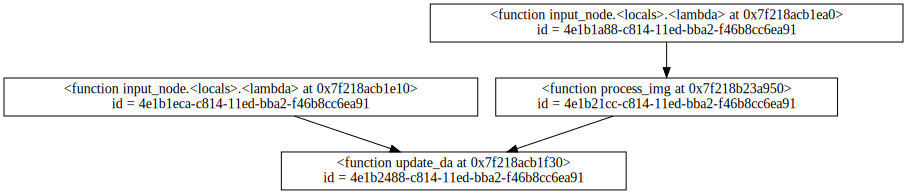

In [11]:
simg = np.zeros((64, 64))
base = sc.DataArray(data=sc.zeros(sizes={'y': 64, 'x': 64}),
                    coords={'x': sc.linspace('x', 0, 65, 65, unit='m'),
                            'y': sc.linspace('y', 0, 65, 65, unit='m')})

img_receiver = pp.input_node(simg)
img_rendered = pp.input_node(base)
preprocess = pp.Node(process_img, img_receiver)
plotting = pp.Node(update_da, img_rendered, preprocess)
pp.show_graph(plotting)

In [12]:
import asyncio

async def async_img_generator(raw_img):
    for frame in detector_image_generator(raw_img):
        yield(frame)
        await asyncio.sleep(0.1)

async def my_stream_func(graph, raw_img):
    async for frame in async_img_generator(raw_img):
        global simg
        simg = frame
        graph.notify_children('update')

streaming_task = asyncio.create_task(my_stream_func(plotting, raw_img))

In [13]:
fig = pp.figure2d(plotting)

ValueError: cannot reshape array of size 4096 into shape (256,64,newaxis)

In [ ]:
fig

In [96]:
coords = np.array([(_x, _y) for _y in np.linspace(-10, 10, 51)
                       for _x in np.linspace(-10, 10, 51)])
x_coords = sc.array(dims=['x'], values=coords[:, 0], unit='m')
y_coords = sc.array(dims=['y'], values=coords[:, 1], unit='m')

In [ ]:
def create_obj():
    return sc.DataArray(data=sc.zeros(sizes={'y': 50, 'x': 50}),
                                 coords={'x': sc.linspace('x', -10, 10, 51, unit='m'),
                                         'y': sc.linspace('y', -10, 10, 51, unit='m')})

da = create_obj()

In [ ]:
da

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread("../../../docs/resources/icon.png")

In [ ]:
indices = [[x, y] for y in range(256) for x in range(256) if sum(img[x][y]) > 0]

In [ ]:
events = np.array(indices)/256*20-10

In [ ]:
np.random.shuffle(events)

In [ ]:
groups = events[:-(len(events)%32)].reshape((-1,32,2))

In [ ]:
igroup = 0

def update_da():
    global igroup
    igroup += 1
    counts, _, _ = np.histogram2d(groups[igroup][:, 1], -1*groups[igroup][:, 0],
                                  bins=(np.linspace(-10, 10, 51),
                                        np.linspace(-10, 10, 51)))
    da.values += counts
    return da

In [49]:
img_da = sc.array(dims=['x', 'y', 'current'], values=img)

In [61]:
img_da['x', 0]

<scipp.Variable> (y: 256, current: 4)    float32  [dimensionless]  [0, 0, ..., 0, 0]

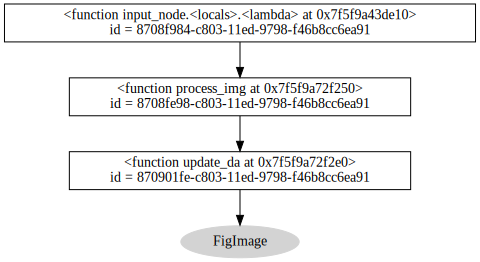

In [150]:
pp.show_graph(plotting)

In [1]:
from beamlime.resources.images.loaders import load_icon_img
from beamlime.resources.images.generators import detector_image_generator

In [7]:
raw_img = load_icon_img()

In [29]:
for frame in detector_image_generator(raw_img):
    simg = frame
    break

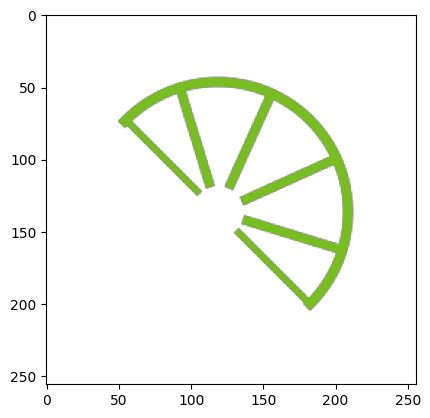

In [9]:
plt.imshow(raw_img)

In [4]:
from matplotlib import pyplot as plt

In [6]:
plt.show()